In [1]:
%load_ext autoreload
%autoreload 2

In [63]:
import numpy as np
import argparse
from overcooked_ai_py.agents.agent import AgentPair
from overcooked_ai_py.visualization.state_visualizer import StateVisualizer
from overcooked_ai_py.agents.benchmarking import AgentEvaluator

# from human_aware_rl.imitation.behavior_cloning_tf2 import (    _get_base_ae, BehaviorCloningPolicy)
from overcooked_ai_py.mdp.overcooked_env import OvercookedEnv, Overcooked
from overcooked_ai_py.mdp.overcooked_mdp import OvercookedGridworld
from tqdm.auto import trange
import warnings


import matplotlib.pyplot as plt

In [62]:
layout_names = [
    "cramped_room",
    "asymmetric_advantages",
    "coordination_ring",
    "forced_coordination",
    "counter_circuit",
]

In [64]:
for layout_name in layout_names:
    base_mdp = OvercookedGridworld.from_layout_name(layout_name)
    base_env = OvercookedEnv.from_mdp(base_mdp, info_level=0, horizon=400)
    env = Overcooked(base_env=base_env, featurize_fn=base_env.featurize_state_mdp)
    obs, reward, terminated, infos = env.step((2, 2))
    lossless_state = base_mdp.lossless_state_encoding(obs["overcooked_state"])
    print(layout_name, end="\t\t")
    print(f"lossless_state: {np.array(lossless_state).shape}  ", end="\t")
    feature_state = env.featurize_fn(obs["overcooked_state"])
    feature_state[0].shape
    print(f"feature state: {np.array(feature_state).shape}")

cramped_room		lossless_state: (2, 5, 4, 26)  	feature state: (2, 96)
asymmetric_advantages		lossless_state: (2, 9, 5, 26)  	feature state: (2, 96)
coordination_ring		lossless_state: (2, 5, 5, 26)  	feature state: (2, 96)
forced_coordination		lossless_state: (2, 5, 5, 26)  	feature state: (2, 96)
counter_circuit		lossless_state: (2, 9, 5, 26)  	feature state: (2, 96)


In [71]:
obs["both_agent_obs"]

(array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., -2.,  1.,  0.,  1., -1.,
        -3.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., -3.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0., -2., -3.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0., -2.,  3.,  0.,  3., -1., -1.,  0.,  0.,  0.,  0., -1.,
         3.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -2., -1.,  1.,  1.,  0.,
         0.,  0., -2.,  5.,  3.]),
 array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., -2.,  3.,  0.,  3., -1.,
        -1.,  0.,  0.,  0.,  0., -1.,  3.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., -1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0., -2., -1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0., -2.,  1.,  0.,  1., -1., -3.,  0.,  0.,  0.,  0., -1.,
         1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -3.,
         1.,  1.

In [70]:
feature_state

[array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., -2.,  1.,  0.,  1., -1.,
        -3.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., -3.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0., -2., -3.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0., -2.,  3.,  0.,  3., -1., -1.,  0.,  0.,  0.,  0., -1.,
         3.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -2., -1.,  1.,  1.,  0.,
         0.,  0., -2.,  5.,  3.]),
 array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., -2.,  3.,  0.,  3., -1.,
        -1.,  0.,  0.,  0.,  0., -1.,  3.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., -1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0., -2., -1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0., -2.,  1.,  0.,  1., -1., -3.,  0.,  0.,  0.,  0., -1.,
         1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -3.,
         1.,  1.

In [72]:
[1, 2, 3, 4][2, 3]

<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
/tmp/ipykernel_1103681/3866702185.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [1, 2, 3, 4][2, 3]
/tmp/ipykernel_1103681/3866702185.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [1, 2, 3, 4][2, 3]
/tmp/ipykernel_1103681/3866702185.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [1, 2, 3, 4][2, 3]


TypeError: list indices must be integers or slices, not tuple

In [13]:
base_mdp = OvercookedGridworld.from_layout_name(layout_name)
base_env = OvercookedEnv.from_mdp(base_mdp, info_level=0, horizon=400)
env = Overcooked(base_env=base_env, featurize_fn=base_env.featurize_state_mdp)

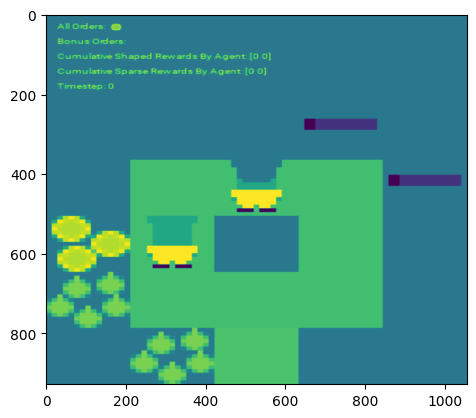

In [33]:
plt.imshow(env.render()[:, :, 1])

In [14]:
obs, reward, terminated, infos = env.step((2, 2))

In [19]:
obs, reward, infos = env.reset()

In [22]:
obs

'both_agent_obs'

In [ ]:
# from overcooked_ai_py.mdp.actions import MediumLevelActionManager

ImportError: cannot import name 'MediumLevelActionManager' from 'overcooked_ai_py.mdp.actions' (/home/leonardo/Projects/project/AAS_project/overcooked_ai/src/overcooked_ai_py/mdp/actions.py)

In [28]:
obs["overcooked_state"].players

((2, 2) facing (1, 0) holding None, (3, 1) facing (1, 0) holding None)

In [10]:
result = env.reset()
result.keys()

dict_keys(['both_agent_obs', 'overcooked_state', 'other_agent_env_idx'])

In [34]:
len(obs["both_agent_obs"][1])

96

In [35]:
lossless_state = base_mdp.lossless_state_encoding(obs["overcooked_state"])
lossless_state[0].shape

(5, 5, 26)

In [15]:
feature_state = env.featurize_fn(obs["overcooked_state"])
feature_state[0].shape

(96,)

In [16]:
import time

t = time.time()
ckpoint_id = int((t * 10) % 1e6)
lt = time.localtime(t)
print(f"policy_{lt[3]}_{lt[4]}_{lt[5]}_{ckpoint_id}.h5")

policy_18_10_2_554020.h5


In [17]:
infos

{'agent_infos': [{}, {}],
 'sparse_r_by_agent': [0, 0],
 'shaped_r_by_agent': [0, 0],
 'phi_s': None,
 'phi_s_prime': None,
 'policy_agent_idx': 1}

In [2]:
from gen_env import GeneralizedOvercooked

/home/leonardo/Projects/project/AAS_project/.venv2/lib/python3.10/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [30]:
go = GeneralizedOvercooked()
s = go.step((2, 2))

In [35]:
s[4]

{'agent_infos': [{}, {}],
 'sparse_r_by_agent': [0, 0],
 'shaped_r_by_agent': [0, 0],
 'phi_s': None,
 'phi_s_prime': None,
 'policy_agent_idx': 1}

In [39]:
a = (1, 2, 3)
b = (1, *a)
b

(1, 1, 2, 3)

In [40]:
env.action_space

Discrete(6)

In [2]:
import tensorflow as tf
import numpy as np

In [9]:
a = tf.convert_to_tensor(np.array([1]))
tf.squeeze(a).numpy()

1

In [ ]:
a=1
l = 

In [53]:
with tf.device("CPU:0"):
    a = tf.zeros((4,))
    print(a.device)

with tf.device("GPU:0"):
    print(tf.gather(a, (2, 3)).device)

/job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0


In [54]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [70]:
kurs = 11
idxs = np.arange(kurs)
batch_size = 2

idxs = [
    idxs[i * batch_size : (i + 1) * batch_size]
    for i in np.arange((kurs // batch_size) + (1 if kurs % batch_size else 0))
]
idxs

[array([0, 1]),
 array([2, 3]),
 array([4, 5]),
 array([6, 7]),
 array([8, 9]),
 array([10])]

In [11]:
import tensorflow_probability as tfp
import tensorflow as tf

In [27]:
dist = tfp.distributions.Categorical(logits=[0, 0, 0])

In [37]:
dist.sample()

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [55]:
dist = tfp.distributions.Categorical(logits=[0.5, 1, 2, 3])
dist.sample()
dist.log_prob(float(dist.sample()))

<tf.Tensor: shape=(), dtype=float32, numpy=-2.960773468017578>

In [10]:
np.array([1, 2, 3, 4])[:10]

array([1, 2, 3, 4])

In [69]:
from gen_env import GeneralizedOvercooked

env = GeneralizedOvercooked(layouts=["cramped_room"])

In [75]:
s = env.step((2, 2))

In [74]:
s[-1]["shaped_r_by_agent"], s[2]

([0, 0], 0)

In [73]:
np.concatenate(s[1], axis=-1).shape

(192,)

In [76]:
s

([array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0.,  0., -2.,
          1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
          0.,  0.,  0.,  0., -1., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  1.,  0.,  0.,  0., -2.,  2.,  0.,  0.,  0.,  0.,  0.,
          2.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
          0.,  0., -1.,  3.,  2.]),
  array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -2.,
          2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,  0.,
          0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  1., -1.,  0.,  0., -2.,  1.,  0.,  0.,  0.,  0.,  0.,
          1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -1., -2.,
  

In [77]:
s["both_agent_obs"]

TypeError: tuple indices must be integers or slices, not str

In [79]:
next_state, reward, episode_over, _info = env.cur_env.step((2, 2))

In [80]:
next_state

{'both_agent_obs': (array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0.,  0., -2.,
          1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
          0.,  0.,  0.,  0., -1., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  1.,  0.,  0.,  0., -2.,  2.,  0.,  0.,  0.,  0.,  0.,
          2.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
          0.,  0., -1.,  3.,  2.]),
  array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -2.,
          2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,  0.,
          0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  1., -1.,  0.,  0., -2.,  1.,  0.,  0.,  0.,  0.,  0.,
          1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,

In [83]:
np.concatenate(next_state["both_agent_obs"])

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0.,  0., -2.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0., -1., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0., -2.,  2.,  0.,  0.,  0.,  0.,  0.,
        2.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        0.,  0., -1.,  3.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0., -2.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0.,  0., -2.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0., -1., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0

env.cur_env.action_space.n